In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('FuelConsumptionCo2.csv')
dados.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# verificando se há valores missing
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
# observando estatísticas gerais
dados.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
#verificando nome das colunas
dados.columns.values

array(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'], dtype=object)

In [6]:
# 1067 linhas e 13 colunas
dados.shape

(1067, 13)

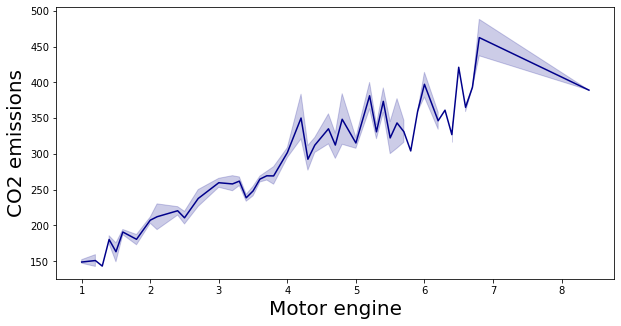

In [7]:
#ENGINESIZE, é uma caracteística que impacta diretamente a emissão de CO2.
# O gráfico demonstra uma relação positiva entre as emissões e a força do motor
plt.figure(figsize=(10,5))
sns.lineplot(x=dados['ENGINESIZE'], y=dados['CO2EMISSIONS'],color='darkblue') 
plt.xlabel('Motor engine',fontsize=20) 
plt.ylabel('CO2 emissions',fontsize=20) 
plt.show()

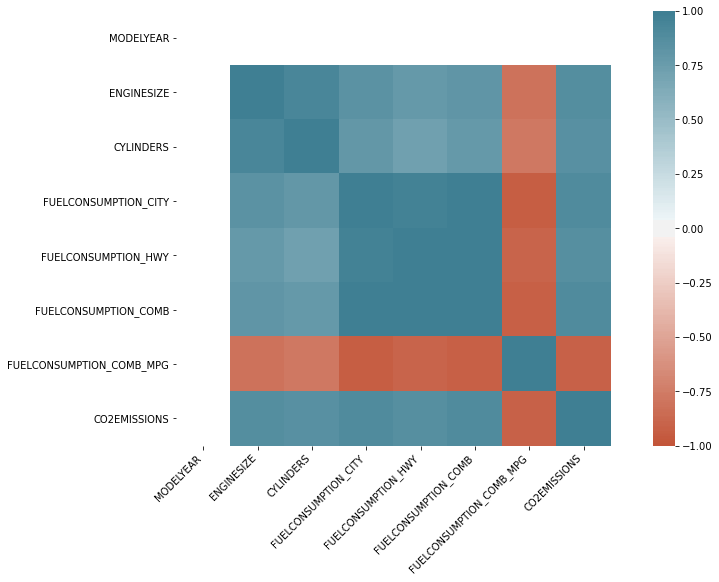

In [8]:
# verificar o nível de correlação entre as variáveis
plt.figure(figsize=(15,8)) 
corr = dados.corr() 
ax = sns.heatmap(     
     corr,      
     vmin=-1, vmax=1, center=0,     
     cmap=sns.diverging_palette(20, 220, n=200),     
     square=True 
) 
ax.set_xticklabels(     
     ax.get_xticklabels(),     
     rotation=45,     
     horizontalalignment='right' 
);

In [9]:
# importanto as bibliotecas necessárias para aplicar os modelos
from sklearn import linear_model 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [10]:
#transformar as características em variáveis
engine= dados[['ENGINESIZE']] 
co2 = dados[['CO2EMISSIONS']]

In [11]:
# separando os dados em treino e teste
engine_treino, engine_test, co2_treino, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=0)

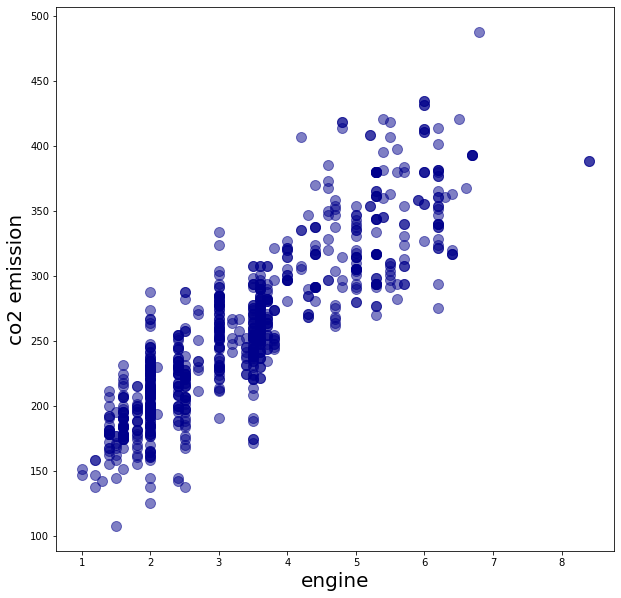

In [12]:
#plotando as correlações
plt.figure(figsize=(10,10))
plt.scatter(engine_treino, co2_treino, color='darkblue',s=100,alpha=0.5)
plt.xlabel('engine',fontsize=20)
plt.ylabel('co2 emission',fontsize=20)
plt.show()

# Regressão Linear (Linear regresion)
A fórmula de regressão linear é Y = A + B*X. Isso significa que o modelo teve que descobrir os valores de 'A' e 'B' para prever a emissão de CO2 'Y' dado um tamanho de motor 'X'. O próximo passo consiste em construir o modelo e treiná-lo para encontrar esses dois coeficientes:

In [13]:
# criando o modelo de regressão linear
modelo = linear_model.LinearRegression()
modelo.fit(engine_treino, co2_treino)

LinearRegression()

In [14]:
# Obtendo os coeficiente angular e linear da reta de ajuste
print(f'(A) coeficiente angular: {modelo.intercept_} | (B) coeficiente linear: {modelo.coef_}')

(A) coeficiente angular: [126.18920155] | (B) coeficiente linear: [[39.24838431]]


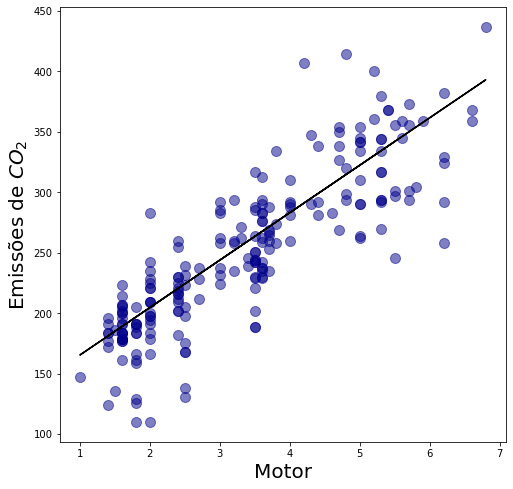

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(engine_test, co2_test, color='darkblue',s=100,alpha=0.5)
plt.plot(engine_test, modelo.coef_[0][0]*engine_test + modelo.intercept_[0], 'black')
plt.ylabel('Emissões de $CO_2$',fontsize=20)
plt.xlabel('Motor',fontsize=20)
plt.show()

In [16]:
predictCO2 = modelo.coef_*engine_test + modelo.intercept_

In [17]:
# Avaliando a eficiência do modelo 
person_error = round(r2_score(predictCO2, co2_test),2)
print(f'R2-score: {person_error}') 

R2-score: 0.63


In [18]:
# Significa que nossos valores de a e b são capazes de explica 63 % da variância entre engine e co2